In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


#tf.enable_eager_execution()

# !pip install -q tensorflow-datasets

2.0.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 64s 3ms/sample - loss: 0.5195 - accuracy: 0.7239 - val_loss: 0.3835 - val_accuracy: 0.8370
Epoch 2/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.3127 - accuracy: 0.8740 - val_loss: 0.3460 - val_accuracy: 0.8508
Epoch 3/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.2477 - accuracy: 0.9056 - val_loss: 0.3869 - val_accuracy: 0.8366
Epoch 4/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.2011 - accuracy: 0.9272 - val_loss: 0.3903 - val_accuracy: 0.8332
Epoch 5/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.1610 - accuracy: 0.9462 - val_loss: 0.4350 - val_accuracy: 0.8338
Epoch 6/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.1345 - accuracy: 0.9555 - val_loss: 0.5211 - val_accuracy: 0.8241
Epoch 7/50
25000/25000 [==============================] 

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

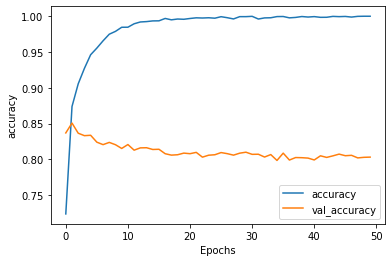

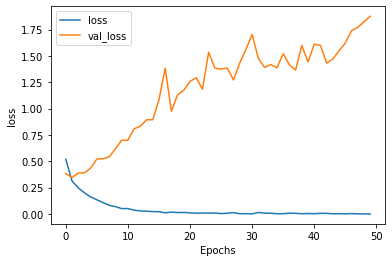

In [9]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [10]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 59s 2ms/sample - loss: 0.4679 - accuracy: 0.7698 - val_loss: 0.3514 - val_accuracy: 0.8418
Epoch 2/50
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2958 - accuracy: 0.8804 - val_loss: 0.3548 - val_accuracy: 0.8456
Epoch 3/50
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2372 - accuracy: 0.9094 - val_loss: 0.3727 - val_accuracy: 0.8400
Epoch 4/50
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1921 - accuracy: 0.9289 - val_loss: 0.4680 - val_accuracy: 0.8186
Epoch 5/50
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.1489 - accuracy: 0.9468 - val_loss: 0.4917 - val_accuracy: 0.8210
Epoch 6/50
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.1124 - accuracy: 0.9611 - val_loss: 0.4873 - val_accuracy: 0.8246
Epoch 7/50
25000/25000 [==============================] 

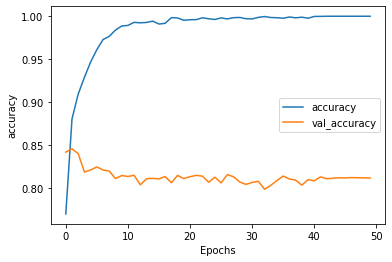

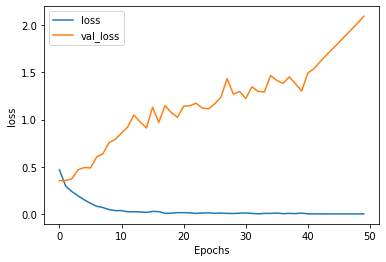

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [13]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 14s 564us/sample - loss: 0.4419 - accuracy: 0.7883 - val_loss: 0.3428 - val_accuracy: 0.8520
Epoch 2/50
25000/25000 [==============================] - 9s 372us/sample - loss: 0.2783 - accuracy: 0.8860 - val_loss: 0.3501 - val_accuracy: 0.8483
Epoch 3/50
25000/25000 [==============================] - 9s 374us/sample - loss: 0.2220 - accuracy: 0.9144 - val_loss: 0.3935 - val_accuracy: 0.8317
Epoch 4/50
25000/25000 [==============================] - 10s 398us/sample - loss: 0.1833 - accuracy: 0.9335 - val_loss: 0.4324 - val_accuracy: 0.8250
Epoch 5/50
25000/25000 [==============================] - 10s 381us/sample - loss: 0.1490 - accuracy: 0.9478 - val_loss: 0.4903 - val_accuracy: 0.8255
Epoch 6/50
25000/25000 [==============================] - 9s 373us/sample - loss: 0.1205 - accuracy: 0.9596 - val_loss: 0.5333 - val_accuracy: 0.8174
Epoch 7/50
25000/25000 [=======================

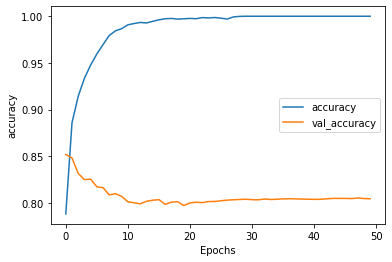

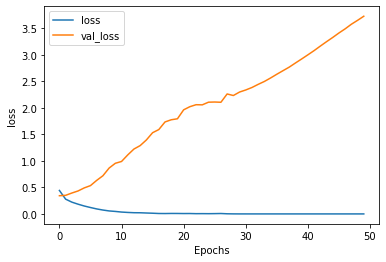

In [15]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')